<a href="https://colab.research.google.com/github/friedGarlic/TrainingModel_Charts/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv("student_dataset.csv")
li = ["TrainingSequence", "CompletionTime", "PerformanceScore", "FeedbackScore", "EmployeeID"]
df

,TrainingSequence,CompletionTime,PerformanceScore,FeedbackScore,EmployeeID
0,101,30,85,4.5,1
1,102,45,92,4.2,1
2,101,35,78,3.8,2
3,103,50,88,4.0,2
4,102,40,95,4.8,3
5,103,55,80,3.5,3
6,101,32,90,4.2,4
7,102,48,87,4.0,4
8,103,60,89,4.5,4
9,101,28,82,3.5,5


In [ ]:
df["EmployeeID"].unique()

array([1, 2, 3, 4, 5])

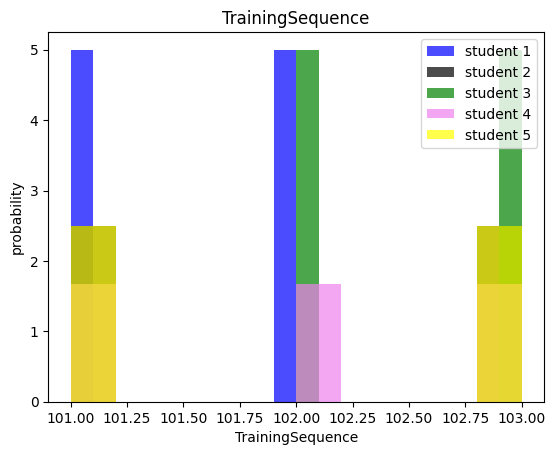

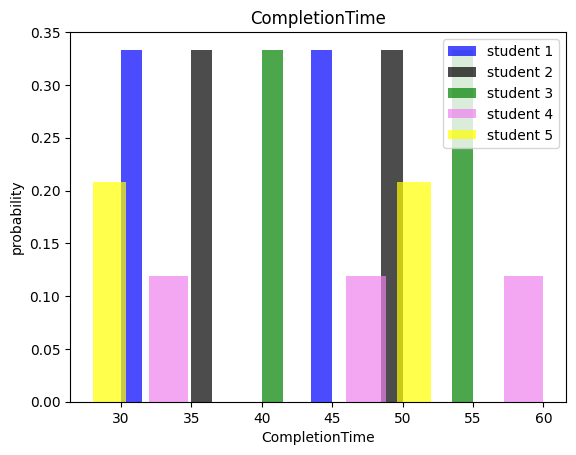

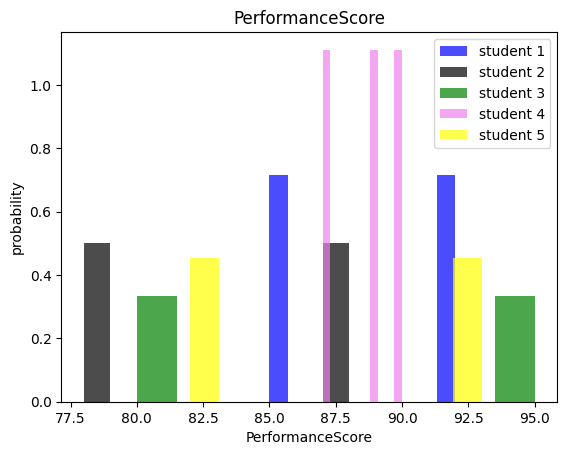

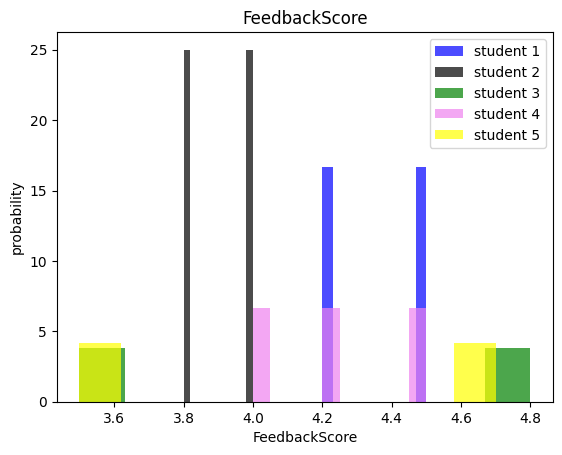

In [ ]:
for label in li[:-1]:
  plt.hist(df[df["EmployeeID"]==1][label], color='blue', label='student 1', alpha=0.7, density=True)
  plt.hist(df[df["EmployeeID"]==2][label], color='black', label='student 2', alpha=0.7, density=True)
  plt.hist(df[df["EmployeeID"]==3][label], color='green', label='student 3', alpha=0.7, density=True)
  plt.hist(df[df["EmployeeID"]==4][label], color='violet', label='student 4', alpha=0.7, density=True)
  plt.hist(df[df["EmployeeID"]==5][label], color='yellow', label='student 5', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with StudentID and labels
unique_students = df['EmployeeID'].unique()
num_labels = len(df.columns) - 1  # Excluding 'StudentID'

fig, axes = plt.subplots(nrows=len(unique_students), ncols=num_labels, figsize=(15, 3*len(unique_students)))

for i, student_id in enumerate(unique_students):
    student_data = df[df['EmployeeID'] == student_id]

    for j, label in enumerate(df.columns[:-1]):
        axes[i, j].hist(student_data[label], alpha=0.7, density=True)
        axes[i, j].set_title(f'Student {student_id}')
        axes[i, j].set_ylabel('Probability')
        axes[i, j].set_xlabel(label)

plt.tight_layout()
plt.show()

#Train, Validation, Test DataSets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )


In [ ]:
#scale the data since some of the sets are far off

def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  #2d representation in horizontal, y is not 2d so reshape using numpy
  data = np.hstack((X, np.reshape(y,(-1,1))))

  return data,X,y

In [ ]:
#can be oversample if necessary
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#kNN implementation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# a simple RNN for short data set, small data set

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')               # epoch means training cycle
  plt.ylabel('Binary crossentropy') #model weights during training, the less the better
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(4,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #projecting the predictions to be 0 and 1
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
  )

#validation split leave 20% out and test model, then take 20% and test it. to see what is going on
#verbose is just so it doesnt print the training process(annoying to look at)

In [ ]:
plot_loss(history)
plot_accuracy(history)

Loss Decrease: The loss value decreases during each epoch, indicating that the model is learning and adjusting its parameters to better fit the training data.

accuracy: The loss seems to be linear, which is a just ok/positive sign. However, the val_accuracy might not be very informative on its own.

#RNN to know whether the students is having a hard time by predicting the completion time of weekly report submittion


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

progress_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")  # linear activation for regression task
])

progress_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

progress_history = progress_model.fit(
    X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0
)

mse = progress_model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# Predict completion times for new data
new_data = np.array([[101,45,89,1]])
new_data_scaled = scaler.transform(new_data)
predicted_completion_time = progress_model.predict(new_data_scaled)
print(f'Predicted Completion Time: {predicted_completion_time}')

1/1 [==============================] - 0s 54ms/step - loss: 0.7914
Mean Squared Error on Test Set: 0.7913527488708496
1/1 [==============================] - 0s 118ms/step
Predicted Completion Time: [[59.07241]]


#A DIFFERENT APPROACH FOR AUTO GRADE, TRAINING THE MODEL USING PDF INPUTS

In [105]:
%pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 11.6 MB/s eta 0:00:00


#First try of extracting words from pdf

In [118]:
import fitz  # PyMuPDF

def num_words_pdf(filename):
    pdf_file = fitz.open(filename)
    number_of_pages = pdf_file.page_count

    pattern = ' '
    total_number_of_spaces = 0

    for page_number in range(number_of_pages):
        page = pdf_file[page_number]
        page_text = page.get_text()
        counted_spaces_per_page = page_text.count(pattern)
        total_number_of_spaces += counted_spaces_per_page


    pdf_file.close()

    return total_number_of_spaces

num_words_pdf("PROGRESS-REPORT.pdf")
print(total_number_of_spaces)


1850


#First One Is better than the next, where the 1850 words are exact, and the 9514 includes the special characters

In [107]:
import fitz

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ''
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

In [112]:
extracted = extract_text_from_pdf('PROGRESS-REPORT.pdf')
print(len(extracted))

9514


#Will train model for number_of_words and grade for different kinds of pdf

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df2 = pd.read_csv("report_grade.csv")
# dataFrame df with 'Number_of_Words' and 'Grade' columns
X = df2[['NumberOfWords']]
y = df2['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# predictions on the test set
predictions = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 84.76353774118704


#Predicting by having the numberof words


In [ ]:
new_predictions = model.predict(new_data[['Number_of_Words']])